<a href="https://colab.research.google.com/github/Thuy01234567/AIO/blob/main/modul4_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line5 % matplotlib inline

def load_data_from_file(fileName = "/content/advertising.csv"):
  data = np.genfromtxt(fileName, dtype = None, delimiter =',', skip_header =1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  features_X = np.insert(features_X, 0, 2, axis = 1)

  return features_X, sales_Y

features_X, _ = load_data_from_file()
print(features_X [:5,:])

[[  2.  230.1  37.8  69.2]
 [  2.   44.5  39.3  45.1]
 [  2.   17.2  45.9  69.3]
 [  2.  151.5  41.3  58.5]
 [  2.  180.8  10.8  58.4]]


In [4]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


Khởi tạo ngẫu nhiên giá trị của n genes(tham số θi)

In [13]:
# Khởi tạo ngẫu nhiên giá trị của n genes(tham số θi)
def create_individual(n=4, bound=10):
  individual = []
  # *************** Your code here *******
  for i in range(n):
    individual.append(random.uniform(-bound/2, bound/2))
  # **************************************
  return individual
individual = create_individual()
print(individual)

[1.1088697344380165, 4.130110532378982, 4.666063677707587, -0.22990223447282965]


In [22]:
features_X, sales_Y = load_data_from_file()
def compute_loss(individual):
  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  loss = np.multiply((y_hat - sales_Y),(y_hat - sales_Y)).mean()
  return loss
def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 0
  # ************ your code here ************
  fitness_value = 1/(loss+1)
  # ****************************************
  return fitness_value


In [23]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.011061966263816e-06


In [24]:
def crossover(individual1, individual2, crossover_rate = 0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()
  #*************** Your code here **************
  for i in range(len(individual1)):
    if random.random() < crossover_rate:
      individual1_new[i] = individual2[i]
      individual2_new[i] = individual1[i]
  #*********************************************
  return individual1_new, individual2_new

In [25]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print(" individual1 : ", individual1)
print(" individual2 : ", individual2)

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [26]:
def mutate(individual, mutation_rate = 0.05) :
  individual_m = individual.copy()
  # ******** Your code here ******************
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual_m[i] = random.uniform(-10, 10)
  # ******************************************
  return individual_m

In [28]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [33]:
def initializePopulation(m) :
  population = [ create_individual() for _ in range(m) ]
  return population

def selection(sorted_old_population, m = 100) :
  index1 = random.randint(0, m -1)
  while True :
    index2 = random.randint(0, m -1)
    if(index2 != index1) :
      break
  individual_s = sorted_old_population [ index1 ]
  if index2 > index1 :
    individual_s = sorted_old_population [ index2 ]
  return individual_s

def create_new_population(old_population, elitism =2, gen =1) :
  m = len(old_population)
  sorted_population = sorted(old_population, key = compute_fitness)
  if gen %1 == 0:
    print("Best loss :", compute_loss(sorted_population [m -1]), " with chromsome : ",sorted_population [m -1])
  new_population = []
  while len(new_population) < m - elitism :

    # selection
    # **************** your code here ****************
    individual_1 = selection(sorted_population, m)
    individual_2 = selection(sorted_population, m)

    # crossover
    # **************** your code here ****************
    individual_c1, individual_c2 = crossover(individual_1, individual_2)
    # mutation
    # **************** your code here ****************
    individual_m1 = mutate(individual_c1)
    individual_m2 = mutate(individual_c2)
    # copy elitism chromosomes that have best fitness score to the next generation
    new_population.append(individual_m1)
    new_population.append(individual_m2)

  for ind in sorted_population [m - elitism :]:
    # **************** your code here ****************
    new_population.append(ind)
    # *************************************************

  return new_population, compute_loss(sorted_population [m -1])

In [34]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [ individual1, individual2 ]
new_population, _ = create_new_population(old_population, elitism =2, gen =1)

Best loss : 125313.34690080497  with chromsome :  [3.44, 2.57, -0.79, -2.41]


In [41]:
def run_GA() :
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations) :
  # *********** your code here *************
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)
  # ****************************************
  return losses_list

Best loss : 1165.7047679387697  with chromsome :  [-1.0933674434344312, 0.3458352586103155, -1.509183787018682, -0.06176959558359041]
Best loss : 1165.7047679387697  with chromsome :  [-1.0933674434344312, 0.3458352586103155, -1.509183787018682, -0.06176959558359041]
Best loss : 604.9331191607338  with chromsome :  [3.3281128044561896, 0.060332565131716365, -0.9845065228852388, 1.0421417182885602]
Best loss : 557.3822716424354  with chromsome :  [2.8279631064784274, 0.24330570586657796, 0.2095803864229353, -0.7599131761265054]
Best loss : 412.9647927030765  with chromsome :  [-0.25208674582632185, 0.060332565131716365, -0.9845065228852388, 0.8656488986166977]
Best loss : 140.65129744731811  with chromsome :  [7.676997225478161, 0.012886221840654244, 0.1993637239034669, -0.43140097781007825]
Best loss : 140.65129744731811  with chromsome :  [7.676997225478161, 0.012886221840654244, 0.1993637239034669, -0.43140097781007825]
Best loss : 140.65129744731811  with chromsome :  [7.67699722547

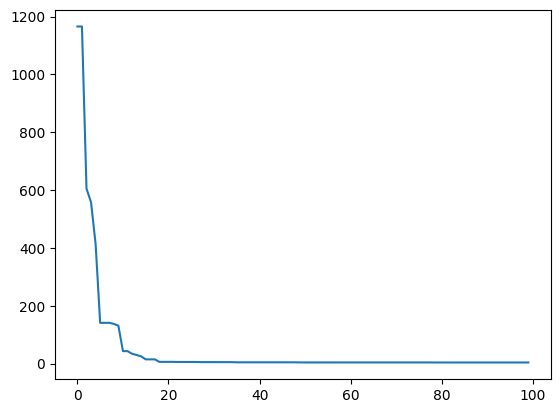

In [50]:
import matplotlib.pyplot as plt
def visualize_loss(losses_list) :
  # *********** your code here *************
  plt.plot(losses_list)
  plt.show()
  # ****************************************
losses_list = run_GA()
visualize_loss(losses_list)

[-0.9324207280093724, 0.15444768713112467, 0.28832401626567616, -1.5543145753351428]


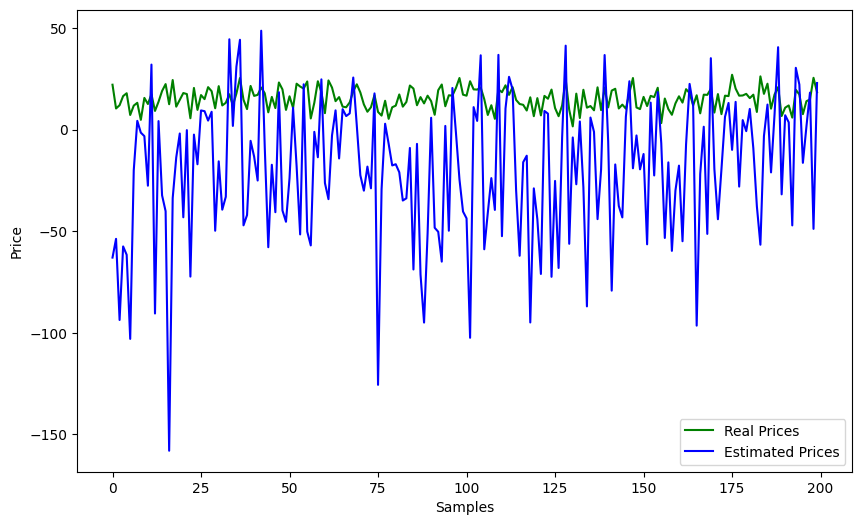

In [51]:
def visualize_predict_gt() :
  # visualization of ground truth and predict value
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(100)
  sorted_population = sorted(population, key = compute_fitness)
  print(sorted_population [ -1])
  theta = np.array(sorted_population [ -1])
  estimated_prices = []
  for feature in features_X :
    # ************* your code here *************
    estimated_prices.append(feature.dot(theta))

    # ******************************************

  fig, ax = plt.subplots(figsize =(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c = 'green', label = 'Real Prices')
  plt.plot(estimated_prices, c = 'blue', label ='Estimated Prices')
  plt.legend()
  plt.show()
visualize_predict_gt()